In [1]:
import pandas as pd
import numpy as np

# Load prepared datasets
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val   = pd.read_csv('../data/processed/X_val.csv')
X_test  = pd.read_csv('../data/processed/X_test.csv')

y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_val   = pd.read_csv('../data/processed/y_val.csv').values.ravel()
y_test  = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (2158, 24)
Validation shape: (462, 24)
Test shape: (463, 24)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import joblib

# Initialize model (baseline → default parameters)
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)[:, 1]

print("Model training completed")


Model training completed


In [3]:
# Calculate metrics
accuracy  = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall    = recall_score(y_val, y_val_pred)
f1        = f1_score(y_val, y_val_pred)
roc_auc   = roc_auc_score(y_val, y_val_prob)

baseline_metrics = {
    "model_name": "Logistic Regression (Baseline)",
    "accuracy": round(accuracy, 4),
    "precision": round(precision, 4),
    "recall": round(recall, 4),
    "f1_score": round(f1, 4),
    "roc_auc": round(roc_auc, 4)
}

baseline_metrics


{'model_name': 'Logistic Regression (Baseline)',
 'accuracy': 0.7056,
 'precision': 0.6176,
 'recall': 0.5966,
 'f1_score': 0.6069,
 'roc_auc': 0.7444}

In [4]:
import json
import os

os.makedirs('../models', exist_ok=True)

with open('../models/baseline_metrics.json', 'w') as f:
    json.dump(baseline_metrics, f, indent=4)

print("Baseline metrics saved")


Baseline metrics saved


In [5]:
joblib.dump(model, '../models/logistic_regression.pkl')
print("Baseline model saved")


Baseline model saved


<Figure size 600x600 with 0 Axes>

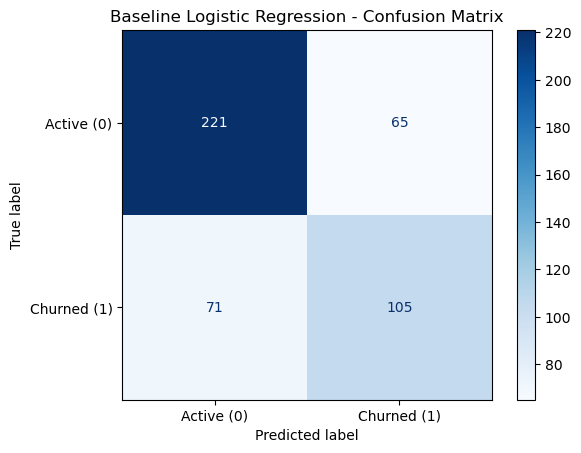

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

cm = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Active (0)", "Churned (1)"]
)

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Baseline Logistic Regression - Confusion Matrix")

os.makedirs('../visualizations', exist_ok=True)
plt.savefig('../visualizations/baseline_confusion_matrix.png')
plt.show()
